# Exploring Dimensionality Reduction using Principal Component Analysis and t-SNE

## Abstract

Using SKLearn's diabetes dataset I aim to explore the effects of dimensionality on retention of data structure when used for clustering. The effects of principal component analysis and T-SNE (t-distributed Stochastic Neighbor Embedding) on retention of original data structure can then be analysed through evaluation metrics such as Silhouette score after clustering has been performed.
In this study clustering is performed through the Kmeans++ algorithm.


In [1]:
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pd.set_option("display.notebook_repr_html", False)  # disable "rich" output

# Load diabetes dataset
diabetes_data = load_diabetes()

# Convert to DataFrame
df = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)
x = diabetes_data.data
y = diabetes_data.target

df.head(5)

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  

Text(0.5, 0, 'PC3')

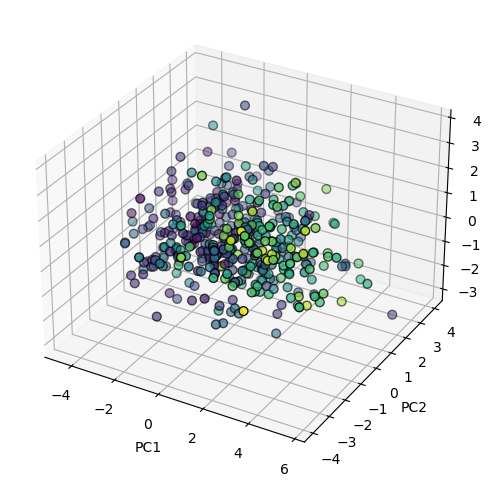

In [2]:
# Standardise features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Apply PCA to generate 3 principal components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(x_scaled)

# Create DataFrame for principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Plot the first three principal components
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(principal_df['PC1'], principal_df['PC2'], principal_df['PC3'], marker='o', c=diabetes_data.target, cmap='viridis', edgecolor='k', s=40)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

In [3]:
var= pca.explained_variance_ratio_
print(var)


[0.40242108 0.14923197 0.12059663]


`var` tells us the variance ratios for each principal component in descending order. This tells us how much total variance is accounted for by each component.

From this we can see that the first component explains approximately 40% of the total variance, the second component explains ~15% and the third component 12%. 

This variance corresponds to the variance along each axis after PCA rotates the data into a new coordinate axis. 

The percentage itself is calculated by dividing the eigenvalue by the sum of all eigenvalues, creating a ratio of how much total variance in the data is explained by each principal component.


In [4]:
# Compute correlation matrix between principal components
correlation_matrix = principal_df.corr()

# Print correlation matrix
print("Correlation matrix between principal components:")
print(correlation_matrix)

Correlation matrix between principal components:
              PC1           PC2           PC3
PC1  1.000000e+00  5.739905e-17 -1.772437e-16
PC2  5.739905e-17  1.000000e+00  7.835828e-17
PC3 -1.772437e-16  7.835828e-17  1.000000e+00


We can check for correlation between these three components using a correlation matrix.

The off-diagonal values are very small (close to 0) suggesting that the principal components are indeed orthogonal to each other. This is expected with PCA.

Therefore this suggests that the principal components are capturing the variation in the original data without redundancy.

## Using t-Distributed Stochastic Neighbor Embedding (t-SNE) on the same dataset 


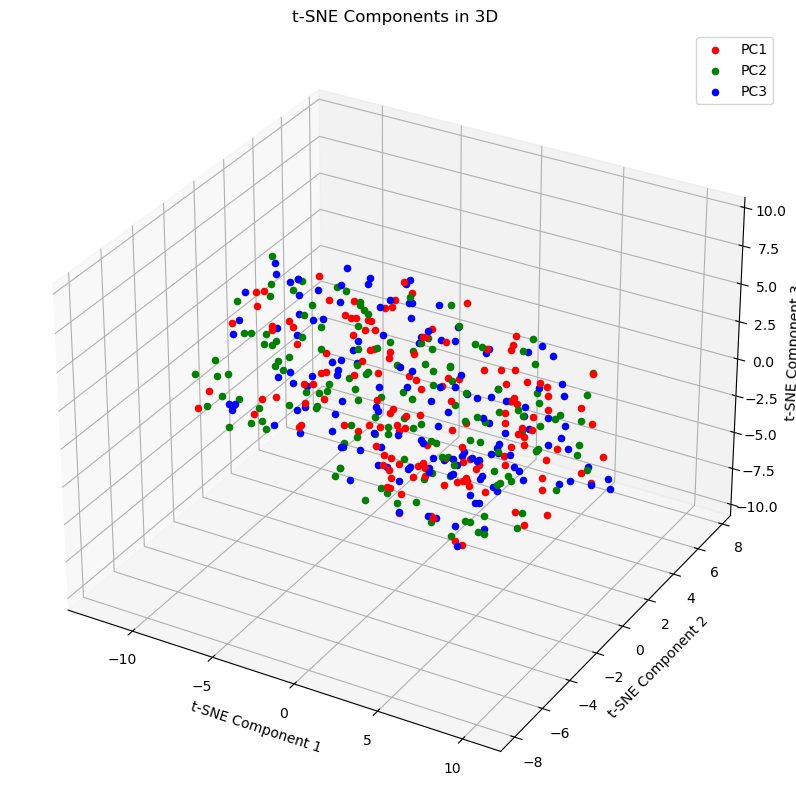

In [5]:
from sklearn.manifold import TSNE
import plotly.express as px

tsne = TSNE(n_components=3, random_state=0)
tsne_components = tsne.fit_transform(x_scaled)

# Create DataFrame for t-SNE components
tsne_df = pd.DataFrame(data=tsne_components, columns=['TSNE1', 'TSNE2', 'TSNE3'])

# Create a color map for principal components
color_map = {0: 'red', 1: 'green', 2: 'blue'}  # Assigning different colors for different components

# Plot in 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(tsne_df)):
    ax.scatter(tsne_df.loc[i, 'TSNE1'], tsne_df.loc[i, 'TSNE2'], tsne_df.loc[i, 'TSNE3'], c=color_map[i % 3], marker='o')

ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title('t-SNE Components in 3D')

# Create a custom legend
for component, color in color_map.items():
    ax.scatter([], [], [], c=color, label=f'PC{component + 1}')

ax.legend()

plt.show()

## Comparing Kmeans using results from t-SNE and PCA


D:\Coding\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Coding\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Coding\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Coding\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there a

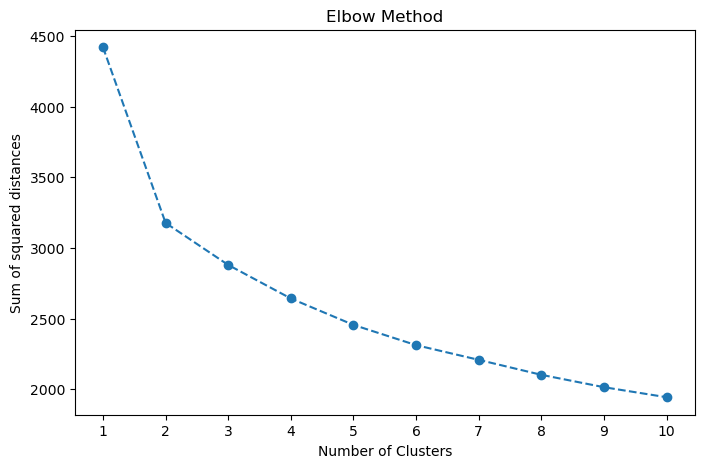

In [6]:
# Determine the optimal number of clusters using the elbow method
from sklearn.cluster import KMeans

sum_squared_distance = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10)
    kmeans.fit(x_scaled)
    sum_squared_distance.append(kmeans.inertia_)

# Plotting the elbow method to determine the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sum_squared_distance, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distances')
plt.xticks(range(1, 11))
plt.show() # k=2 or k=3 appear to be most optimal with Elbow method but not very distinct

D:\Coding\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Coding\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Coding\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Coding\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there a

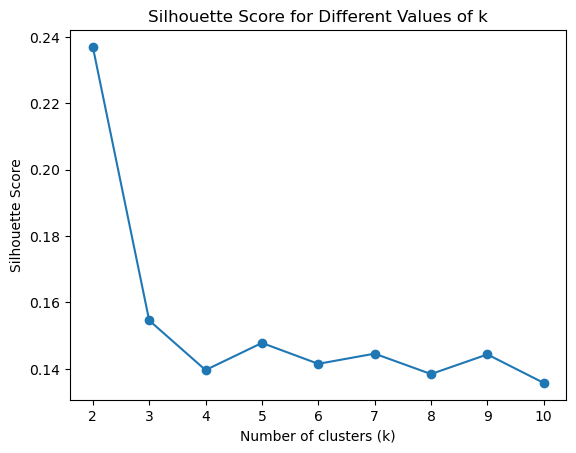

Optimal k value based on Silhouette Score: 2


In [7]:
# Determine the optimal number of clusters using the Silhouette score
from sklearn.metrics import silhouette_score

# Initialize a list to store silhouette scores
silhouette_scores = []

# Define range of k values to try
k_values = range(2, 11)

# Iterate over each k value and compute silhouette score
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10)
    cluster_labels = kmeans.fit_predict(x_scaled)
    silhouette_avg = silhouette_score(x_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg) 

# Find the optimal k value
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))] # 2

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.xticks(k_values)
plt.show()
# Silhouette score is highest for 2 clusters
print(f"Optimal k value based on Silhouette Score: {optimal_k}")

Based on Elbow method and Silhouette score optimal k appears to be 2.

We can then perform Kmeans++ on the t-SNE and PCA components using k=2.


In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Use k=2 clusters results of Elbow method and Silhouette score
n_clusters = 2

# Initialize k-means models
kmeans_tsne = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)

# Fit k-means models on t-SNE and PCA components
kmeans_tsne.fit(tsne_components)
kmeans_pca.fit(principal_components)

# Predict clusters
tsne_cluster_labels = kmeans_tsne.labels_
pca_cluster_labels = kmeans_pca.labels_

# Evaluate silhouette score
silhouette_tsne = silhouette_score(tsne_components, tsne_cluster_labels)
silhouette_pca = silhouette_score(principal_components, pca_cluster_labels)

print("Silhouette Score for t-SNE: ", silhouette_tsne) #0.44007516
print("Silhouette Score for PCA: ", silhouette_pca) #0.3544849161614378

D:\Coding\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Coding\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score for t-SNE:  0.44007516
Silhouette Score for PCA:  0.3544849161614378


The silhouette scores used to evaluate Kmeans obtained using t-SNE and PCA show that t-SNE components resulted in more defined and separated clusters compared to clustering performed on PCA components.

This suggests that t-SNE transformation was able to better preserve the underlying structure of the data in comparison to dimension reduction using PCA.